<a href="https://colab.research.google.com/github/alirezash97/Computer-Vision/blob/main/Images/Skin_RedEye_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

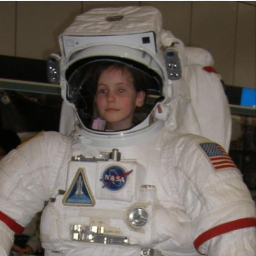

In [2]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

image = cv2.imread('/content/RedEye.png')
image = cv2.resize(image, (256, 256))
cv2_imshow(image)

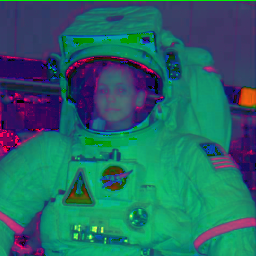

In [8]:
hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
cv2_imshow(hls)

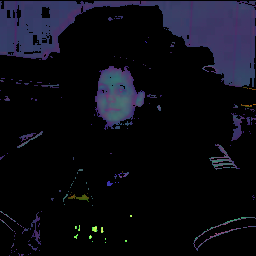

In [25]:
def skin(hls_image):

  skin_image = np.zeros_like(hls_image)
  for i in range(hls_image.shape[0]):
    for j in range(hls_image.shape[1]):
      if ((hls_image[i, j, 2] >= 50) and ( 0.5 < float(hls_image[i, j, 1] / hls_image[i, j, 2])) and
       (float(hls_image[i, j, 1] / hls_image[i, j, 2]) < 3) and ((14 <= hls_image[i, j, 0]) or (hls_image[i, j, 0 ] >= 165))):
        skin_image[i, j, 0] = hls_image[i, j, 0]
        skin_image[i, j, 1] = hls_image[i, j, 1]
        skin_image[i, j, 2] = hls_image[i, j, 2]
      else:
        pass
  return skin_image

skin_image = skin(hls)
cv2_imshow(skin_image)


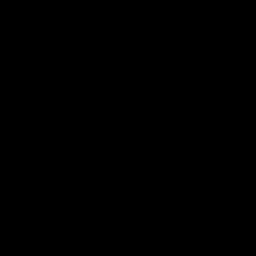

In [31]:
def redeye(hls_image):

  epsilon = 0.0001
  redeye_image = np.zeros_like(hls_image)
  for i in range(hls_image.shape[0]):
    for j in range(hls_image.shape[1]):
      if ((hls_image[i, j, 1] >= 64) and ( 0.5 < (hls_image[i, j, 1] / (hls_image[i, j, 2]+epsilon))) and (hls_image[i, j, 2] >= 100) and 
       ((hls_image[i, j, 1] / (hls_image[i, j, 2])+epsilon) < 1.5) and ((7 >= hls_image[i, j, 0 ]) or (hls_image[i, j, 0 ] >= 162))):
        redeye_image[i, j, 0] = hls_image[i, j, 0]
        redeye_image[i, j, 1] = hls_image[i, j, 1]
        redeye_image[i, j, 2] = hls_image[i, j, 2]
      else:
        pass
  return redeye_image

redeye_image = redeye(hls)
cv2_imshow(redeye_image)